<a href="https://colab.research.google.com/github/lowtech1/test/blob/main/EDV_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data Wrangling

Here, we'd load our data from CSV file and drive deeper into it to check for any required cleaning steps

In [2]:
#loading red wine data and viewing head
df_red = pd.read_csv('wineQualityReds.csv')
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#loading white wine data and viewing head
df_white = pd.read_csv('wineQualityWhites.csv')
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


Xac dinh gia tri duy nhat trong cac cot

In [6]:
df_red.nunique()

,0
Unnamed: 0,1599
fixed.acidity,96
volatile.acidity,143
citric.acid,80
residual.sugar,91
chlorides,153
free.sulfur.dioxide,60
total.sulfur.dioxide,144
density,436
pH,89


In [7]:
df_white.nunique()

,0
Unnamed: 0,4898
fixed.acidity,68
volatile.acidity,125
citric.acid,87
residual.sugar,310
chlorides,160
free.sulfur.dioxide,132
total.sulfur.dioxide,251
density,890
pH,103


In [8]:
print(df_red.duplicated().sum(), df_white.duplicated().sum())

0 0


Exploration Summery
1. Khung dữ liệu rượu đỏ gồm 1599 bản ghi và 13 thuộc tính, trong khung dữ liệu rượu trắng gồm 4898 bản ghi và 13 thuộc tính
2. Cả 2 khung dữ liệu đều không có giá trị NaN và không có giá trị trùng lập
3. Chúng tôi sẽ kết hợp cả 2 khung dữ liệu và thêm một cột danh mục mới để chỉ màu rượu để phân tích tốt hơn
4. Kiểu dữ liệu của các cột là nhất quán
5. Cột "Unnamed:0" sẽ được loại bỏ


Data Cleaning

Ở đây chúng tôi sẽ thực hiện một số quy trình vào khung dữ liệu của chúng để làm cho quá trình phân tích dễ dàng hơn Appending new color column and merging dataframes

In [9]:
#create color array for red dataframes
color_red = np.repeat('red', df_red.shape[0])

#create color array for white dataframes
color_white = np.repeat('white', df_white.shape[0])

In [10]:
#appending new column and confirming changes
df_red['color'] = color_red
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
#appending new column and cofirming changes
df_white['color'] = color_white
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Bây giờ có 2 khung dữ liệu với một cột color bổ sung để xác định màu của dữ liệu hãy tiến vào quá trình gộp chúng thành một và lưu chúng lại

In [12]:
#append dataframes and cofirm changes
wine_df = pd.concat([df_white, df_red], axis =0, ignore_index= True)
wine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [13]:
wine_df.duplicated().sum()

0

In [14]:
#casting color column and confirming changes
wine_df['color'] = wine_df['color'].astype('category')
wine_df['color'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False, categories_dtype=object)

In [15]:
#dropping column and confirming changes
wine_df.drop('Unnamed: 0', axis = 1, inplace = True )
wine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         6497 non-null   float64 
 1   volatile.acidity      6497 non-null   float64 
 2   citric.acid           6497 non-null   float64 
 3   residual.sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free.sulfur.dioxide   6497 non-null   float64 
 6   total.sulfur.dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  color                 6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


Data Visualization and EDA

Trong phần này, Sẽ sử dụng summery statistica cùng với các thư viện như matplotlib và seaborn để thu thập thông tin trả lời các câu hỏi trong EDA (Exploratory Data Analysis)

In [17]:
#setting up seaborn configurations
sns.set_style('whitegrid')

Những đặc điểm hóa học nào quan trong nhất trong việc dự đoán chất lượng rượu

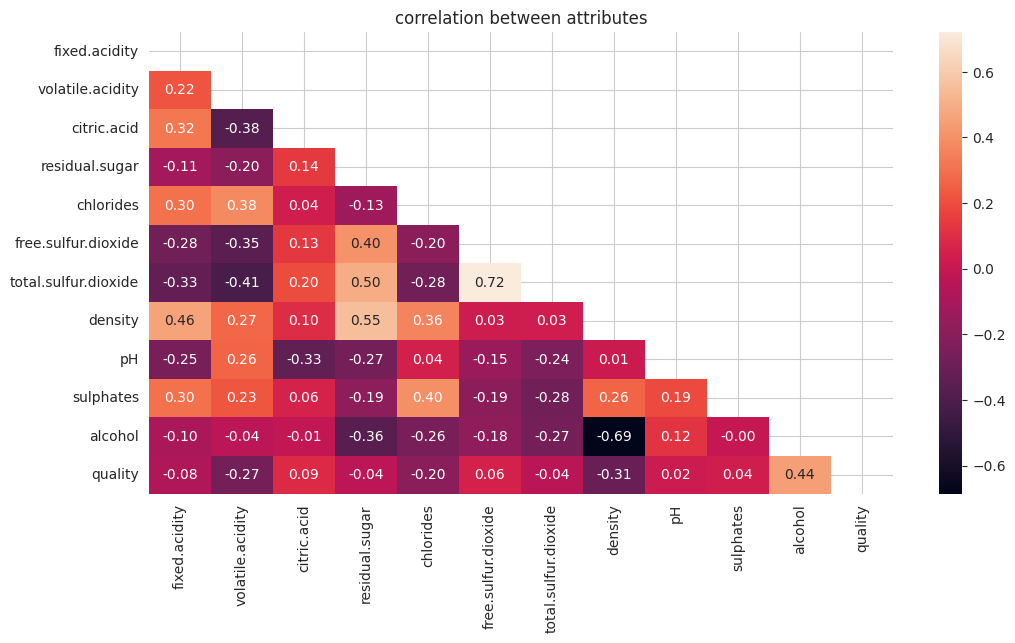

In [22]:
#plotting corelation heatmap
plt.figure(figsize=(12,6))
corr = wine_df.corr(numeric_only=True)
mask = np.triu(corr)
sns.heatmap(corr, annot = True, mask = mask, fmt='.2f')
plt.title("correlation between attributes")
plt.show()

Từ biểu đồ tương quan trên chúng ta có thể dễ dàng nhận thấy xem có những thuộc tính quan mạnh với chất lượng rượu với thuộc tính khác

1. Các thuộc tính tương quan mạnh

    Cồn (alcohol) và chất lượng (quality) và rõ ràng rằng đây là một quan hệ mạnh nhất ảnh hưởng đến chất lượng rượu

2. Các thuộc tính tương quan yếu (không phụ thuộc vào nhau)

    density and alcohol

    free sulphur.dioxide and citric acid gần như không tương quan với quanlity

3. density có tương quan mạnh dương với đường ( residual sugar) và tuognw quan mạnh alcohol

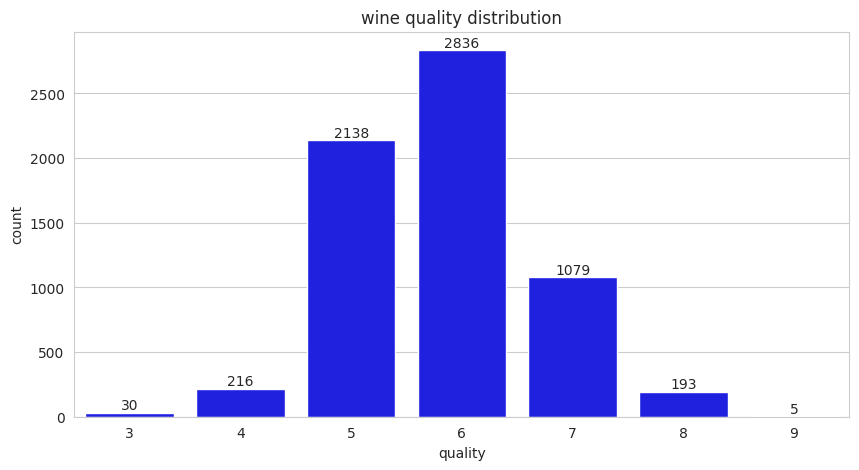

In [24]:
figure = plt.figure(figsize =(10,5))
ax = sns.countplot(x = 'quality', data = wine_df, color = 'blue')
plt.title('wine quality distribution')
ax.bar_label(ax.containers[0], label_type ='edge')
plt.show()

the vast majority of the wine has a quality of 6 while less numbers has a quality of 9

**Loại rượu cụ thể (đỏ và trắng) có thể liên quan đến chất lượng cao hơn không?**

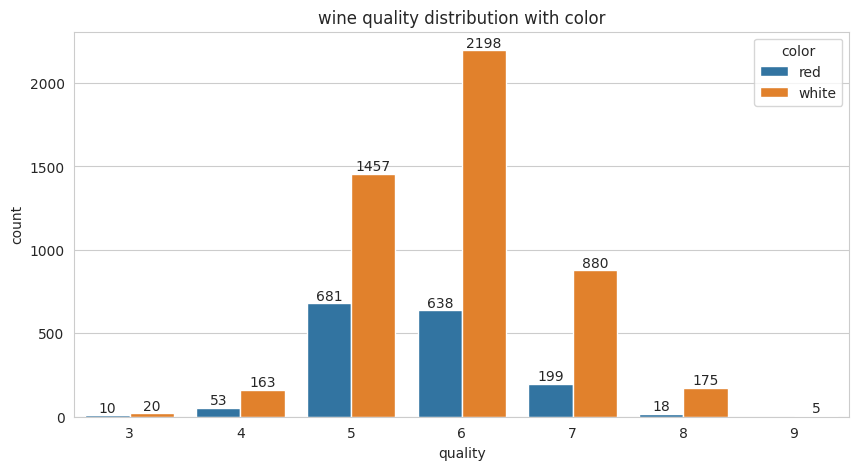

In [26]:
figure = plt.figure(figsize =(10,5))
ax = sns.countplot(x = 'quality', hue ='color', data = wine_df)
plt.title('wine quality distribution with color')
ax.bar_label(ax.containers[0], label_type ='edge')
ax.bar_label(ax.containers[1], label_type = 'edge')
plt.show()

Có sự chênh lệch đáng kể giữa số lượng rượu trắng và rượu đỏ

Hầu hết rượu trắng có chất lượng 6 trong khi hầu hết rượu đỏ có chất lượng 5

<ipython-input-32-c870617839c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'color', data=wine_df, palette = ['red', 'blue'])


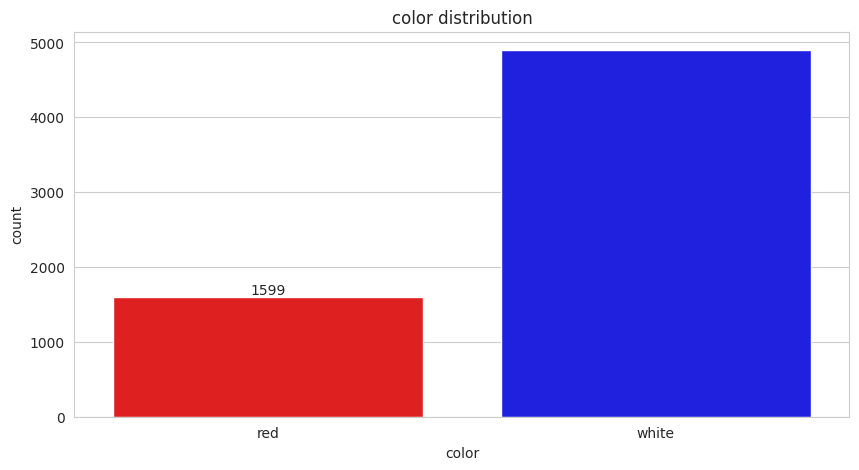

In [32]:
#plotting wine color dist
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'color', data=wine_df, palette = ['red', 'blue'])
plt.title('color distribution')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

Chúng ta có thể thấy rằng rượu trắng chiếm đa số lớn trong bộ dữ liệu của chúng ta vì nó xuất hiện trong hơn 75% trường hợp

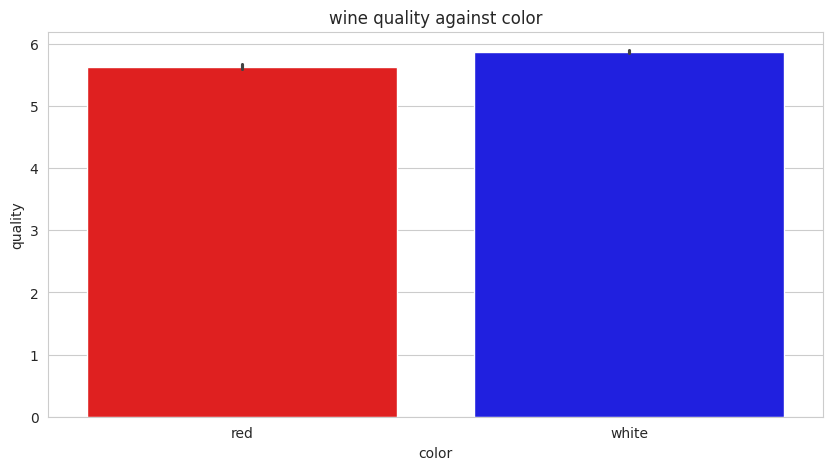

In [38]:
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'color', y = 'quality', data = wine_df, hue = 'color', palette = ['red', 'blue'])
plt.title('wine quality against color')
plt.show()

In [39]:
wine_df.groupby('color')['quality'].mean()

<ipython-input-39-f89febb268a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('color')['quality'].mean()


,quality
color,
red,5.636023
white,5.877909


Chất lượng trung bình của rượu đỏ và rượu trắng rất gần nhau

Rượu trắng có chất lượng trung bình tốt nhất cao hơn rượu đỏ

**Rượu có nồng độ cao có điểm đánh giá tốt hơn không?**

In [40]:
#viewing stats about alcoholic content
wine_df['alcohol'].describe()

,alcohol
count,6497.000000
mean,10.491801
std,1.192712
min,8.000000
25%,9.500000
50%,10.300000
75%,11.300000
max,14.900000


Có nồng độ cồn cao nhất là 14,9

Hầu hết rượu đều có nồng độ cồn khoảng 10,4

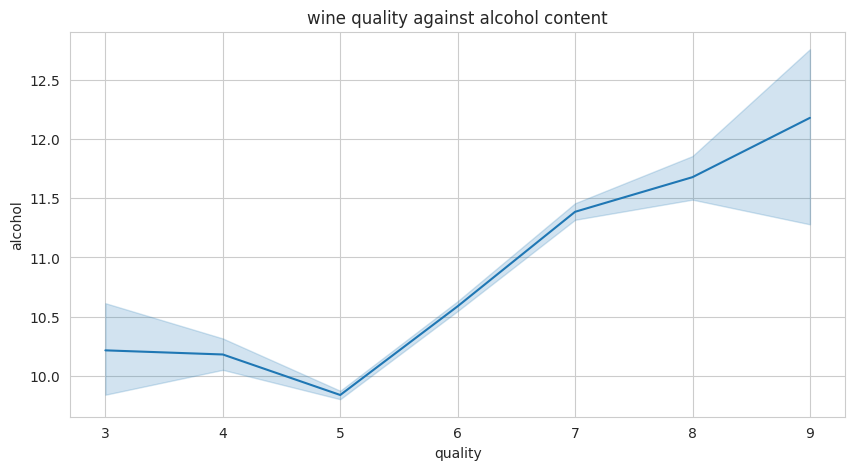

In [43]:
#plotting alcohol and quality
figure = plt.figure(figsize =(10,5))
ax = sns.lineplot(x = 'quality', y = 'alcohol', data =wine_df)
plt.title('wine quality against alcohol content')
plt.show()

Hầu hết dữ liệu của chúng ta có chất lượng 6 có vẽ có nồng độ cồn tương đối thấp, nhưng vẫn cao

Nồng độ cồn cao chỉ xuất hiện trong dữ liệu của chúng ta với rượu chất lượng cao

**Rượu ngọt hơn (có nhiều đường dư hơn) có điểm đánh giá tốt hơn không?**

In [46]:
wine_df['residual.sugar'].describe()

,residual.sugar
count,6497.000000
mean,5.443235
std,4.757804
min,0.600000
25%,1.800000
50%,3.000000
75%,8.100000
max,65.800000


<ipython-input-48-fb510033f430>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x ='quality',


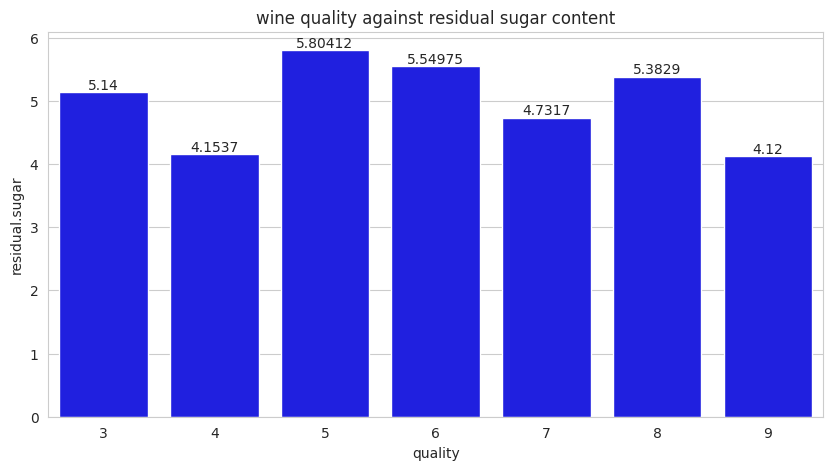

In [48]:
#plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x ='quality',
                  y = 'residual.sugar',
                  data =wine_df,color ='blue',
                  ci =None)
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title('wine quality against residual sugar content')
plt.show()
